# An Introduction to Python for Mathematics

## a crash course

*Simon Shaw*

<https://www.brunel.ac.uk/people/simon-shaw>.

Summer 2024

<table>
<tr>
<td>
<img src="https://mirrors.creativecommons.org/presskit/icons/cc.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/by.svg?ref=chooser-v1" style="height:18px"/>
<img src="https://mirrors.creativecommons.org/presskit/icons/sa.svg?ref=chooser-v1" style="height:18px"/>
</td>
<td>

<p>
This work is licensed under CC BY-SA 4.0 (Attribution-ShareAlike 4.0 International)

<p>
Visit <a href="http://creativecommons.org/licenses/by-sa/4.0/">http://creativecommons.org/licenses/by-sa/4.0/</a> to see the terms.
</td>
</tr>
</table>

<table>
<tr>
<td>This document uses python</td>
<td>
<img src="https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" style="height:30px"/>
</td>
<td>and also makes use of LaTeX </td>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/LaTeX_logo.svg/320px-LaTeX_logo.svg.png" style="height:30px"/>
</td>
<td>in Markdown</td> 
<td>
<img src="https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png" style="height:30px"/>
</td>
</tr>
</table>

## Contents

This is a very quick run through of how to use some basic features of python in a Jupyter
notebook. We'll cover:

1. markdown
1. linear algebra
1. plotting
1. prob/stat simulations

There is a lot we don't touch...

## Markdown

First note this cell - it is a **markdown** cell, not a 'code' cell. This allows for
*literate programming*: we can explain our algorithm with bullets, 

- step 1
- step 2
  - substep 2.1
- step 3

or with enumeration,

1. step 1
1. step 2
  1. substep 2.1
1. step 3

We can type maths in LaTeX, like this: find $\boldsymbol{u}\in V$ such that

$$
a(\boldsymbol{u},\boldsymbol{v}) = \langle \daleth, \boldsymbol{v}\rangle
\qquad\forall \boldsymbol{v} \in V.
$$

There is equation numbering, BiBTeX, graphics etc. though... 

## Leontief Input-Output Models

We have 
$\boldsymbol{x} = \boldsymbol{A}\boldsymbol{x}+\boldsymbol{d}$ or, alternatively, 
$(\boldsymbol{I} - \boldsymbol{A})\boldsymbol{x} = \boldsymbol{d}$

First some simple arithmetic as a warm up...

In [1]:
0.9*50000 - 0.5*40000

25000.0

In [2]:
-0.3*50000 + 0.8*40000

17000.0

In [3]:
print(0.9*50000 - 0.5*40000, -0.3*50000 + 0.8*40000)

25000.0 17000.0


Note that
$$
\boldsymbol{A} = {0.1\ 0.5\choose 0.3\ 0.2}
\Longrightarrow
\boldsymbol{I}-\boldsymbol{A}
= {1\ 0\choose 0\ 1}-{0.1\ 0.5\choose 0.3\ 0.2} = {\phantom{-}0.9\ \ -0.5\choose -0.3\ \ \phantom{-}0.8}
$$
and therefore
$$
(\boldsymbol{I}-\boldsymbol{A})^{-1} = \frac{1}{(0.9)(0.8) - (0.5)(0.3)}
{0.8\ \ 0.5\choose 0.3\ \ 0.9}
=\frac{10}{57}{8\ \ 5 \choose 3\ \ 9}
$$

In [4]:
d1=35000; d2=29000; print(10/57*(8*d1 + 5*d2), 10/57*(3*d1 + 9*d2))

74561.40350877192 64210.52631578947


In [5]:
d1=2500; d2=1900; print(10/57*(8*d1 + 5*d2), 10/57*(3*d1 + 9*d2))

5175.438596491228 4315.78947368421


Let's introduce `numpy` - for arrays, linear algebra, ... 

In [6]:
import numpy as np
A = np.array([[0.1, 0.5],[0.3, 0.2]])
# use shift tab
Id = np.eye(2)
print(Id-A)
print(5.7*np.linalg.inv(Id-A))
d = np.array([[35000],[29000]])
print(np.linalg.solve(Id-A, d))
Dd = np.array([[2500],[1900]])
print(np.linalg.solve(Id-A, Dd))

[[ 0.9 -0.5]
 [-0.3  0.8]]
[[8. 5.]
 [3. 9.]]
[[74561.40350877]
 [64210.52631579]]
[[5175.43859649]
 [4315.78947368]]


In [7]:
print('This is the technical matrix: A = ')
A = np.array([[0.15, 0.12, 0.05, 0.03],
              [0.17, 0.16, 0.04, 0.04],
              [0.03, 0.08, 0.18, 0.22],
              [0.07, 0.18, 0.03, 0.19]])
print(A)
print('Here are the total output levels: x = ')
x = np.array([[89000], [55000], [47000], [76000]])
print(x)
print('This is the Leontiev matrix: I-A = ')
Id = np.eye(4)
print(Id-A)
print('The amounts available for external demand are: d = ')
print((Id-A).dot(x))
print('The required total output is: x = ')
d = np.array([[55000],[24000],[18000],[40000]])
print(np.linalg.solve(Id-A, d))
print('The change in external demand: Dd = ')
Dd = np.array([[-5000], [350], [2300],[-500]])
print(Dd)
print(np.linalg.solve(Id-A, Dd))


This is the technical matrix: A = 
[[0.15 0.12 0.05 0.03]
 [0.17 0.16 0.04 0.04]
 [0.03 0.08 0.18 0.22]
 [0.07 0.18 0.03 0.19]]
Here are the total output levels: x = 
[[89000]
 [55000]
 [47000]
 [76000]]
This is the Leontiev matrix: I-A = 
[[ 0.85 -0.12 -0.05 -0.03]
 [-0.17  0.84 -0.04 -0.04]
 [-0.03 -0.08  0.82 -0.22]
 [-0.07 -0.18 -0.03  0.81]]
The amounts available for external demand are: d = 
[[64420.]
 [26150.]
 [14750.]
 [44020.]]
The required total output is: x = 
[[76985.04648009]
 [49721.31303541]
 [48094.90788649]
 [68866.21831676]]
The change in external demand: Dd = 
[[-5000]
 [  350]
 [ 2300]
 [ -500]]
[[-5899.0465539 ]
 [ -730.25568572]
 [ 2193.68789267]
 [-1208.10943879]]


In [8]:
w, V = np.linalg.eig(A)
print(w)
print(V)
D=np.diag(w)
print('D = \n', D)
print(A@V - V@D)
print(np.linalg.norm(A@V - V@D))

[0.42116703+0.j         0.00461882+0.j         0.12710707+0.07455003j
 0.12710707-0.07455003j]
[[-0.36169836+0.j         -0.53830234+0.j         -0.08583289-0.15883797j
  -0.08583289+0.15883797j]
 [-0.41503348+0.j          0.60726175+0.j         -0.2194297 -0.11271916j
  -0.2194297 +0.11271916j]
 [-0.65491995+0.j          0.37609264+0.j          0.87392682+0.j
   0.87392682-0.j        ]
 [-0.51768849+0.j         -0.44723381+0.j         -0.11861447+0.35879066j
  -0.11861447-0.35879066j]]
D = 
 [[0.42116703+0.j         0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.00461882+0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.12710707+0.07455003j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.12710707-0.07455003j]]
[[-1.94289029e-16+0.00000000e+00j  2.60208521e-18+0.00000000e+00j
   5.52943108e-17+4.16333634e-17j  5.52943108e-17-4.16333634e-17j]
 [-1

In [9]:
K = np.array([[1,2,5],[5,-6,1]])   
U, S, VT = np.linalg.svd(K)
print(U)
print(S)
print(VT)

S = np.hstack(( np.diag(S), np.zeros((2,1)) ))

print(S)

print(K - U @ S @ VT)
print(np.linalg.norm(K - U @ S @ VT))

[[-0.06213744  0.9980676 ]
 [ 0.9980676   0.06213744]]
[7.88191065 5.4658471 ]
[[ 0.62525456 -0.77553283  0.08720987]
 [ 0.23944227  0.29699158  0.9243719 ]
 [-0.74278135 -0.55708601  0.37139068]]
[[7.88191065 0.         0.        ]
 [0.         5.4658471  0.        ]]
[[-4.44089210e-16 -4.44089210e-16 -1.77635684e-15]
 [-8.88178420e-16  1.77635684e-15  1.11022302e-16]]
2.739800093299453e-15


## Plotting in 2D

We introduce `matplotlib`. There are others but this seems to be the most common.

Here is a simple example

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


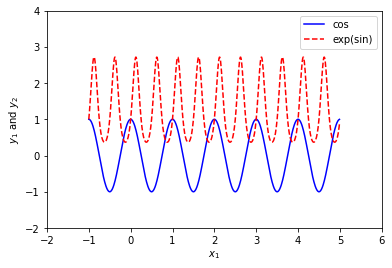

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1,5,0.01)
y1, y2 = np.cos(2*np.pi*x), np.exp(np.sin(4*np.pi*x))
plt.plot(x,y1, 'b-')
plt.plot(x,y2, 'r--')
plt.axis([-2, 6, -2, 4])
plt.legend(['cos', 'exp(sin)'])
plt.xlabel(r'$x_1$'); plt.ylabel('$y_1$ and $y_2$') 
plt.savefig('my2Dplot.png', dpi=600)
plt.savefig('my2Dplot.eps', dpi=600)



Note that once we have imported we don't have to do it again.

However - make sure you execute the notebook from the top down!

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


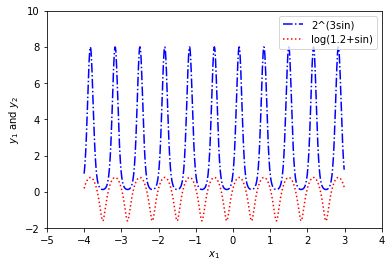

In [11]:
x = np.arange(-4,3,0.01)
y1, y2 = 2**(3*np.sin(3*np.pi*x)), np.log(1.2+np.sin(3*np.pi*x))
plt.plot(x,y1, 'b-.')
plt.plot(x,y2, 'r:')
plt.axis([-5, 4, -2, 10])
plt.legend(['2^(3sin)', 'log(1.2+sin)'])
plt.xlabel(r'$x_1$'); plt.ylabel('$y_1$ and $y_2$') 
plt.savefig('my2Dplot2.png', dpi=600)
plt.savefig('my2Dplot2.eps', dpi=600)

## Anonymity

Based on 

 - https://www.johndcook.com/blog/2018/12/07/simulating-zipcode-sex-birthdate/
 - https://techscience.org/a/2015092903/
 

(array([540.,  86.,  10.,   2.,   0.,   0.,   0.,   0.]),
 array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 8 artists>)

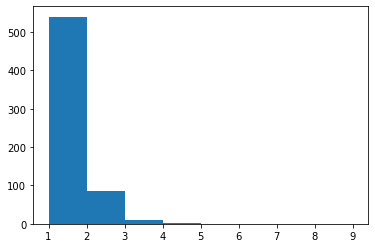

In [12]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np

d = 365*3*2
N = 750
buckets = np.zeros(d)

for _ in range(N):
    z = randrange(d)
    buckets[z] += 1

plt.hist(buckets, range(1,10))

In [13]:
loners = len(buckets[buckets==1])
print('Probability that anonymous data occurs only once: ', loners/N)
print('Nearly exact probability that anonymous data occurs only once: ',
       np.exp(-N/d))
loners2 = len(buckets[buckets==2])
print('Probability that anonymous data occurs at most twice: ',
      (loners+2*loners2)/N)
loners3 = len(buckets[buckets==3])
print('Probability that anonymous data occurs at most three times: ',
      (loners+2*loners2+3*loners3)/N)
loners4 = len(buckets[buckets==4])
print('Probability that anonymous data occurs at most four times: ',
      (loners+2*loners2+3*loners3+4*loners4)/N)

Probability that anonymous data occurs only once:  0.72
Nearly exact probability that anonymous data occurs only once:  0.7100174346347615
Probability that anonymous data occurs at most twice:  0.9493333333333334
Probability that anonymous data occurs at most three times:  0.9893333333333333
Probability that anonymous data occurs at most four times:  1.0


In [14]:
print( sum(buckets) )
print( len(buckets[buckets!=0]) )

print( len(buckets[buckets==1]) )
print( len(buckets[buckets==2]) )
print( len(buckets[buckets==3]) )
print( len(buckets[buckets==4]) )
print( len(buckets[buckets>4]) )


# a check
print( len(buckets[buckets==1])+2*len(buckets[buckets==2])
       +3*len(buckets[buckets==3])+4*len(buckets[buckets==4]) )

750.0
638
540
86
10
2
0
750


## Going Further

if you want to see uses of python in machine learning and data science then you can look at my 
MA5634 binder page here:


<p><a rel="noopener" href="https://mybinder.org/v2/gh/variationalform/FML.git/HEAD">https://mybinder.org/v2/gh/variationalform/FML.git/HEAD</a></p>
<p>Or just click this button:&nbsp;<a rel="noopener" href="https://mybinder.org/badge_logo.svg"> </a><a rel="noopener" href="https://mybinder.org/v2/gh/variationalform/FML.git/HEAD"> <img src="https://mybinder.org/badge_logo.svg" width="120"> </a></p>
<p></p>

The raw materials are on git:

- <https://variationalform.github.io>
- <https://github.com/variationalform/FML>

## Technical Notes, Production and Archiving

Ignore the material below. What follows is not relevant to the material being taught.

#### Production Workflow

- Finalise the notebook material above
- Clear and fresh run of entire notebook
- Create html slide show:
  - `jupyter nbconvert --to slides python_for_maths.ipynb `
- Set `OUTPUTTING=1` below
- Comment out the display of web-sourced diagrams
- Clear and fresh run of entire notebook
- Comment back in the display of web-sourced diagrams
- Clear all cell output
- Set `OUTPUTTING=0` below
- Save
- git add, commit and push to FML
- copy PDF, HTML etc to web site
  - git add, commit and push
- rebuild binder

In [15]:
%%bash
NBROOTNAME=python_for_maths
OUTPUTTING=1

if [ $OUTPUTTING -eq 1 ]; then
  #jupyter nbconvert --to html $NBROOTNAME.ipynb
  #cp $NBROOTNAME.html ./backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.html
  #mv -f $NBROOTNAME.html ./formats/

  jupyter nbconvert --to slides $NBROOTNAME.ipynb
  cp $NBROOTNAME.slides.html ./backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.slides.html
  mv -f $NBROOTNAME.slides.html ./formats/

  jupyter nbconvert --to pdf $NBROOTNAME.ipynb
  cp $NBROOTNAME.pdf ./backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.pdf
  mv -f $NBROOTNAME.pdf ./formats/

  jupyter nbconvert --to script $NBROOTNAME.ipynb
  cp $NBROOTNAME.py ./backups/$(date +"%m_%d_%Y-%H%M%S")_$NBROOTNAME.py
  mv -f $NBROOTNAME.py ./formats/
else
  echo 'Not Generating html, pdf and py output versions'
fi

[NbConvertApp] Converting notebook python_for_maths.ipynb to slides
[NbConvertApp] Writing 699889 bytes to python_for_maths.slides.html
[NbConvertApp] Converting notebook python_for_maths.ipynb to pdf
[NbConvertApp] Support files will be in python_for_maths_files/
[NbConvertApp] Making directory ./python_for_maths_files
[NbConvertApp] Making directory ./python_for_maths_files
[NbConvertApp] Making directory ./python_for_maths_files
[NbConvertApp] Writing 52693 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 125470 bytes to python_for_maths.pdf
[NbConvertApp] Converting notebook python_for_maths.ipynb to script
[NbConvertApp] Writing 9264 bytes to python_for_maths.py
